# Write a Data Science Blog Post - Udacity Data Scientist Nanodegree - Analyzing Airbnb Data for the cities of Bordeaux, Lyon, and Paris (France) #
???????????????????
 
## The Data ##
[http://insideairbnb.com/get-the-data.html](http://insideairbnb.com/get-the-data.html) for Bordeaux, Lyon, and Paris:
 - **listings.csv**    Detailed Listings
 - **calendar.csv**    Availability Dates and Prices for Listings
 - **reviews.csv**     Detailed Review Data for Listings
 - **listings_2.csv**       Summary information and metrics for listings (good for visualisations)
 - **reviews_2.csv**        Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing)

## The Questions ##
Compare **Prices** in all **3 Cities** and find the **primary Factors** for setting them:
1. **Price Distribution**
2. **Price and Availability throughout the Season**
3. **Features** for explaining **Prices**

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as plt_dates
import numpy as np
%matplotlib inline
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics
#from sklearn import tree
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#import seaborn as sns

## Visualize the Data Files ##
### Listings (Bordeaux) ###

In [2]:
listings_Bx_df = pd.read_csv('../Data/listings_Bx.csv', parse_dates=['last_scraped'], dtype={'zipcode': str, 'weekly_price': str, 'monthly_price': str})    # Cf. explanation for dtype below
print("There are {} Listings in Bordeaux, the {} Features are:\n\n{}\n".format(
    listings_Bx_df.shape[0], listings_Bx_df.shape[1], listings_Bx_df.columns.tolist()))    # columns.tolist() avoids truncating the list
listings_Bx_df.head()

There are 10939 Listings in Bordeaux, the 106 Features are:

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,40151,https://www.airbnb.com/rooms/40151,20190827041351,2019-08-27,Sunny flat aux Chartrons,"Situé dans le quartier des Chartrons, cet appa...","Situé dans le quartier des Chartrons, cet appa...","Situé dans le quartier des Chartrons, cet appa...",none,Le quartier des Chartrons est situé dans le ce...,...,f,f,moderate,f,f,2,1,1,0,0.28
1,185534,https://www.airbnb.com/rooms/185534,20190827041351,2019-08-27,L'Echoppe des Bouilles,NaN,L’Échoppe des Bouilles est une maison typique ...,L’Échoppe des Bouilles est une maison typique ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,NaN
2,218103,https://www.airbnb.com/rooms/218103,20190827041351,2019-08-27,B&B (Website hidden by Airbnb) tropical garden,Ce studio spacieux de 35 m² est tout équipé po...,"The Bambooyard : ""Le clos des Bambous"", in Bè...","The Bambooyard : ""Le clos des Bambous"", in Bè...",none,Idéalement situé Bordeaux Sud à l'entrée de Bè...,...,t,f,strict_14_with_grace_period,f,f,4,4,0,0,0.28
3,222887,https://www.airbnb.com/rooms/222887,20190827041351,2019-08-27,"Bordeaux Terrace - spectacular view, fast Wifi","Recently renovated (February 2019), Bordeaux T...",In an 18th century building in the historic he...,"Recently renovated (February 2019), Bordeaux T...",none,Bordeaux Terrace is ideally situated to visit ...,...,t,f,strict_14_with_grace_period,f,f,4,4,0,0,0.38
4,317273,https://www.airbnb.com/rooms/317273,20190827041351,2019-08-27,"Bordeaux City Gardens - large 1 bd, park adjacent",A spacious one bedroom apartment (93 sq metres...,This spacious one bedroom apartment (93 sq met...,A spacious one bedroom apartment (93 sq metres...,none,Bordeaux's famous Jardin Public is at the end ...,...,t,f,moderate,f,f,4,4,0,0,0.31


pd.**read_csv** was passed the argument **dtype={'zipcode': str, 'weekly_price': str, 'monthly_price': str}** above, because it was originally complaining about columns 43, 61, and 62, so I make sure they're loaded as Strings:

In [3]:
listings_Bx_df.iloc[0:10, [43, 61, 62]]

,zipcode,weekly_price,monthly_price
0,33300,$350.00,"$1,250.00"
1,33000,NaN,NaN
2,33130,$630.00,NaN
3,33000,NaN,NaN
4,33000,NaN,NaN
5,33000,NaN,NaN
6,33000,$500.00,"$1,400.00"
7,33130,NaN,NaN
8,33000,NaN,NaN
9,33130,$490.00,NaN


### Calendar (Bordeaux) ###

In [4]:
calendar_Bx_df = pd.read_csv('../Data/calendar_Bx.csv', parse_dates=['date'])
print("\nThere are {} Calendar entries in Bordeaux, the {} Features are:\n\n{}\n".format(
    calendar_Bx_df.shape[0], calendar_Bx_df.shape[1], calendar_Bx_df.columns.tolist()))    # columns.tolist() avoids truncating the list
print("\nThe {} individual Dates span from {} to {}\n".format(
    calendar_Bx_df['date'].nunique(),
    calendar_Bx_df['date'].min().strftime('%d %b %Y'),
    calendar_Bx_df['date'].max().strftime('%d %b %Y')))
calendar_Bx_df.head()


There are 3992735 Calendar entries in Bordeaux, the 7 Features are:

['listing_id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights']


The 365 individual Dates span from 27 Aug 2019 to 25 Aug 2020



,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1190768,2019-08-27,f,$80.00,$80.00,5,355
1,1190768,2019-08-28,f,$80.00,$80.00,5,355
2,1190768,2019-08-29,f,$80.00,$80.00,5,355
3,1190768,2019-08-30,f,$90.00,$90.00,5,355
4,1190768,2019-08-31,f,$90.00,$90.00,5,355


### Reviews (Bordeaux) ###

In [5]:
reviews_Bx_df = pd.read_csv('../Data/reviews_Bx.csv', parse_dates=['date'])
print("\nThere are {} Reviews in Bordeaux, the {} Features are:\n\n{}\n".format(
    reviews_Bx_df.shape[0], reviews_Bx_df.shape[1], reviews_Bx_df.columns.tolist()))    # columns.tolist() avoids truncating the list
reviews_Bx_df.head()


There are 216305 Reviews in Bordeaux, the 6 Features are:

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']



,listing_id,id,date,reviewer_id,reviewer_name,comments
0,40151,99743,2010-09-18,175507,Elizabeth,"Cédric is a great guy! Very hospitable, helpfu..."
1,40151,190588,2011-03-01,135370,Tia,This is a beautiful and spacious apartment wit...
2,40151,199158,2011-03-14,414855,Natalie,Cedric was a wonderful host and his apartment ...
3,40151,307773,2011-06-11,359935,Jim,Cedric's home is clean and modern and well app...
4,40151,328283,2011-06-22,91394,B Harrison,Cedric was fabulous and really went out of his...


In [6]:
listings_Bx_2_df = pd.read_csv('../Data/listings_Bx_2.csv')
print("\nThere are {} Listing_Bx_2 entries, the {} Features are:\n\n{}\n".format(
    listings_Bx_2_df.shape[0], listings_Bx_2_df.shape[1], listings_Bx_2_df.columns.tolist()))    # columns.tolist() avoids truncating the list
listings_Bx_2_df.head()


There are 10939 Listing_Bx_2 entries, the 16 Features are:

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,40151,Sunny flat aux Chartrons,165163,Cédric,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.85653,-0.57460,Entire home/apt,71,3,30,2016-07-29,0.28,2,297
1,185534,L'Echoppe des Bouilles,890736,Carlos,Bordeaux,Saint Augustin - Tauzin - Alphonse Dupeux,44.83063,-0.59331,Private room,75,1,0,NaN,NaN,1,365
2,218103,B&B (Website hidden by Airbnb) tropical garden,1127981,Luis,Bgles,Bgles,44.81418,-0.54842,Entire home/apt,100,2,27,2019-07-28,0.28,4,219
3,222887,"Bordeaux Terrace - spectacular view, fast Wifi",1156398,Suzanna,Bordeaux,Bordeaux Sud,44.83635,-0.56590,Entire home/apt,175,3,35,2019-05-27,0.38,4,319
4,317273,"Bordeaux City Gardens - large 1 bd, park adjacent",1156398,Suzanna,Bordeaux,Chartrons - Grand Parc - Jardin Public,44.84734,-0.58034,Entire home/apt,155,3,19,2019-08-05,0.31,4,315


In [7]:
reviews_Bx_2_df = pd.read_csv('../Data/reviews_Bx_2.csv')
print("\nThere are {} Reviews_Bx_2 entries, the {} Features are:\n\n{}\n".format(
    reviews_Bx_2_df.shape[0], reviews_Bx_2_df.shape[1], reviews_Bx_2_df.columns.tolist()))    # columns.tolist() avoids truncating the list
reviews_Bx_2_df.head()


There are 216305 Reviews_Bx_2 entries, the 2 Features are:

['listing_id', 'date']



,listing_id,date
0,40151,2010-09-18
1,40151,2011-03-01
2,40151,2011-03-14
3,40151,2011-06-11
4,40151,2011-06-22


### Selecting the Data Sources ###
 - **reviews_Bx.csv** would be useful if we decided to apply Natural Language Processing (NLP) to the "comments" feature, but this would be a little overkill in the context of this assignment.
 - **listings_Bx_2.csv** displays a relevant subset of the features in **listings.csv*** features, but not enough, so I won't use it.
 - **reviews_Bx_2.csv** seems totally useless...
 
 I'll focus on the Listings and Calendar data.
 
## Load Lyon and Paris Data ##

In [8]:
listings_Ly_df = pd.read_csv('../Data/listings_Ly.csv', parse_dates=['last_scraped'], dtype={'zipcode': str, 'weekly_price': str, 'monthly_price': str})
print("\nThere are {} Listings in Lyon with {} Features\n".format(
    listings_Ly_df.shape[0], listings_Ly_df.shape[1]))    # columns.tolist() avoids truncating the list
listings_Ly_df[0:1]


There are 11755 Listings in Lyon with 106 Features



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,30187,https://www.airbnb.com/rooms/30187,20190717005527,2019-07-17,Le Petit Tramassac - Old town Lyon,NaN,Le Petit Tramassac welcome you in the heart of...,Le Petit Tramassac welcome you in the heart of...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,7,7,0,0,0.28


In [9]:
calendar_Ly_df = pd.read_csv('../Data/calendar_Ly.csv', parse_dates=['date'])
print("\nThere are {} Calendar entries in Lyon with the {} Features\n".format(
    calendar_Ly_df.shape[0], calendar_Ly_df.shape[1], calendar_Ly_df.columns.tolist()))    # columns.tolist() avoids truncating the list
calendar_Ly_df[0:1]


There are 4290575 Calendar entries in Lyon with the 7 Features



,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,815342,2019-07-17,t,$55.00,$55.00,2,90


In [10]:
listings_Pa_df = pd.read_csv('../Data/listings_Pa.csv', parse_dates=['last_scraped'], dtype={'zipcode': str, 'weekly_price': str, 'monthly_price': str})
print("\nThere are {} Listings in Paris with {} Features\n".format(
    listings_Pa_df.shape[0], listings_Pa_df.shape[1]))    # columns.tolist() avoids truncating the list
listings_Pa_df[0:1]


There are 64293 Listings in Paris with 106 Features



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20190709213457,2019-07-10,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.26


In [11]:
calendar_Pa_df = pd.read_csv('../Data/calendar_Pa.csv', parse_dates=['date'])
print("\nThere are {} Calendar entries in Paris with the {} Features\n".format(
    calendar_Pa_df.shape[0], calendar_Pa_df.shape[1], calendar_Pa_df.columns.tolist()))    # columns.tolist() avoids truncating the list
calendar_Pa_df[0:1]


There are 23467355 Calendar entries in Paris with the 7 Features



,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3109,2019-07-10,f,$75.00,$75.00,3.0,15.0


## Compare Availability and Price throughout the year for all 3 Cities ##

### Clean up the Calendar Data ###

Remove any datapoints with wissing Price or Availability information.

In [12]:
print("\nPrice Data readiness in\n- Bordeaux: {}\n- Lyon: {}\n- Paris: {}\n".format(
    (1 - calendar_Bx_df.isnull()['price'].mean()) * 100,
    (1 - calendar_Ly_df.isnull()['price'].mean()) * 100,
    (1 - calendar_Pa_df.isnull()['price'].mean()) * 100))

print("\nAvailability Data readiness in\n- Bordeaux: {}\n- Lyon: {}\n- Paris: {}\n".format(
    (1 - calendar_Bx_df.isnull()['available'].mean()) * 100,
    (1 - calendar_Ly_df.isnull()['available'].mean()) * 100,
    (1 - calendar_Pa_df.isnull()['available'].mean()) * 100))


Price Data readiness in
- Bordeaux: 100.0
- Lyon: 100.0
- Paris: 99.99922019332813


Availability Data readiness in
- Bordeaux: 100.0
- Lyon: 100.0
- Paris: 100.0



Paris has missing Price data, we need to remove it.
We also need to convert the Price Data from Strings ('$ 123.45') to Floats (123.45)

In [13]:
datapoints_before = calendar_Pa_df.shape[0]
calendar_Pa_df = calendar_Pa_df.dropna(subset=['price'], axis=0)
print("\n{} datapoints were removed from the Paris Calendar Data.\n".format(datapoints_before - calendar_Pa_df.shape[0]))


183 datapoints were removed from the Paris Calendar Data.



In [14]:
cal_Bx_clean_prices_df = calendar_Bx_df.copy()
cal_Bx_clean_prices_df['price'] = cal_Bx_clean_prices_df['price'].str.replace('[\$,]', '').astype('float')
cal_Bx_clean_prices_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1190768,2019-08-27,f,80.0,$80.00,5,355
1,1190768,2019-08-28,f,80.0,$80.00,5,355
2,1190768,2019-08-29,f,80.0,$80.00,5,355
3,1190768,2019-08-30,f,90.0,$90.00,5,355
4,1190768,2019-08-31,f,90.0,$90.00,5,355


In [15]:
cal_Ly_clean_prices_df = calendar_Ly_df.copy()
cal_Ly_clean_prices_df['price'] = cal_Ly_clean_prices_df['price'].str.replace('[\$,]', '').astype('float')
cal_Ly_clean_prices_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,815342,2019-07-17,t,55.0,$55.00,2,90
1,818799,2019-07-17,f,62.0,$62.00,2,1125
2,818799,2019-07-18,f,62.0,$62.00,2,1125
3,818799,2019-07-19,t,62.0,$62.00,1,1125
4,818799,2019-07-20,t,62.0,$62.00,1,1125


In [16]:
cal_Pa_clean_prices_df = calendar_Pa_df.copy()
cal_Pa_clean_prices_df['price'] = cal_Pa_clean_prices_df['price'].str.replace('[\$,]', '').astype('float')
cal_Pa_clean_prices_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3109,2019-07-10,f,75.0,$75.00,3.0,15.0
1,3109,2019-07-11,f,75.0,$75.00,3.0,15.0
2,3109,2019-07-12,f,75.0,$75.00,3.0,15.0
3,3109,2019-07-13,f,75.0,$75.00,3.0,15.0
4,3109,2019-07-14,f,75.0,$75.00,3.0,15.0


### Plot the Price Distribution from the Calendar Data and compare Bordeaux, Lyon, and Paris ###

1. Build the distribution by ascending Price as the index;
2. Find the lowest and highest Prices for all 3 Cities;
3. Find the Price for all 3 Cities above which listings can be considered to be outliers;
4. Plot and compare Price distributions below the Price limit above for all 3 Cities.

In [17]:
# Build the distribution of Prices, sorted by Price (which is the index)
cal_Bx_price_distribution = cal_Bx_clean_prices_df['price'].value_counts().sort_index()
print("\nIn Bordeaux, prices range from {} € to {} €\n".format(
    cal_Bx_price_distribution.index.values.tolist()[0],
    cal_Bx_price_distribution.index.values.tolist()[-1]))


In Bordeaux, prices range from 9.0 € to 4000.0 €



In [18]:
cal_Bx_price_distribution.head()

9.0      202
10.0    1175
11.0      35
12.0     919
13.0    1005
Name: price, dtype: int64

In [19]:
cal_Bx_price_distribution.tail()

1864.0     10
1967.0      5
2000.0    365
2500.0    365
4000.0      8
Name: price, dtype: int64

In [20]:
cal_Ly_price_distribution = cal_Ly_clean_prices_df['price'].value_counts().sort_index()
print("\nIn Lyon, prices range from {} € to {} €\n".format(
    cal_Ly_price_distribution.index.values.tolist()[0],
    cal_Ly_price_distribution.index.values.tolist()[-1]))
cal_Pa_price_distribution = cal_Pa_clean_prices_df['price'].value_counts().sort_index()
print("\nIn Paris, prices range from {} € to {} €\n".format(
    cal_Pa_price_distribution.index.values.tolist()[0],
    cal_Pa_price_distribution.index.values.tolist()[-1]))


In Lyon, prices range from 9.0 € to 9400.0 €


In Paris, prices range from 2.0 € to 25000.0 €



In [21]:
indices = []
for i in range(0, 25001):
    indices.append(i)
print(indices[:5], " -> ", indices[-5:])

[0, 1, 2, 3, 4]  ->  [24996, 24997, 24998, 24999, 25000]


In [22]:
Bx_values = [0] * 25001
Bx_values[0:5]

[0, 0, 0, 0, 0]

In [23]:
Bx_Price_dist = pd.Series(index=indices, data=Bx_values)
print(Bx_Price_dist.head())
print(Bx_Price_dist.tail())

0    0
1    0
2    0
3    0
4    0
dtype: int64
24996    0
24997    0
24998    0
24999    0
25000    0
dtype: int64


In [24]:
for i in cal_Bx_price_distribution.index:
    Bx_Price_dist[i] += cal_Bx_price_distribution[i]
Bx_Price_dist[0:20]

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9       202
10     1175
11       35
12      919
13     1005
14     1321
15     6407
16     3743
17     4567
18    11435
19     8604
dtype: int64

In [25]:
Bx_Price_dist[-20:]

24981    0
24982    0
24983    0
24984    0
24985    0
24986    0
24987    0
24988    0
24989    0
24990    0
24991    0
24992    0
24993    0
24994    0
24995    0
24996    0
24997    0
24998    0
24999    0
25000    0
dtype: int64

The top ends could be **outliers**. Let's check by calculating the percentage of offerings above a certain price and stop at 0.1 %:

In [36]:
prices = []
percentages = []

for price in np.arange(0, 2500, step=10):
    percent = Bx_Price_dist[Bx_Price_dist.index > price].sum() / cal_Bx_clean_prices_df.shape[0] * 100
    prices.append(price)
    percentages.append(percent)
    print("Bordeaux has {} % offerings above {} €.".format(percent, price))
    if percent < 0.1:
        break

Bordeaux has 100.0 % offerings above 0 €.
Bordeaux has 99.96551236182717 % offerings above 10 €.
Bordeaux has 98.19048847469216 % offerings above 20 €.
Bordeaux has 88.91694540208654 % offerings above 30 €.
Bordeaux has 75.58440517590073 % offerings above 40 €.
Bordeaux has 60.57173841990515 % offerings above 50 €.
Bordeaux has 48.953010906058125 % offerings above 60 €.
Bordeaux has 39.61850711354498 % offerings above 70 €.
Bordeaux has 31.844036731713977 % offerings above 80 €.
Bordeaux has 26.140127005674056 % offerings above 90 €.
Bordeaux has 20.86857755398242 % offerings above 100 €.
Bordeaux has 18.532735080089214 % offerings above 110 €.
Bordeaux has 15.816977585539737 % offerings above 120 €.
Bordeaux has 13.813438657962523 % offerings above 130 €.
Bordeaux has 12.375977869806034 % offerings above 140 €.
Bordeaux has 10.305016486193049 % offerings above 150 €.
Bordeaux has 9.269861385741853 % offerings above 160 €.
Bordeaux has 8.455882997494198 % offerings above 170 €.
Bordeau

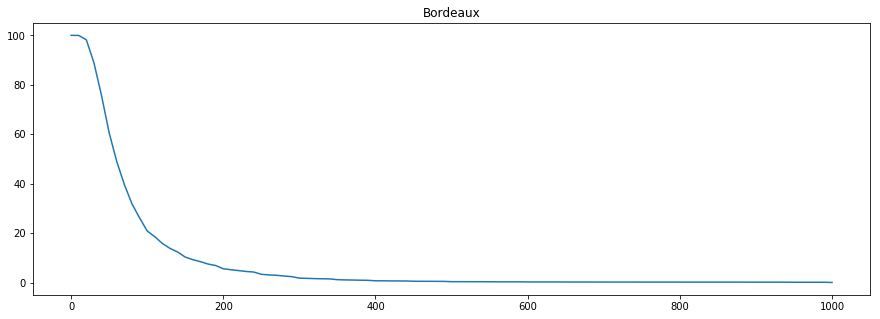

In [37]:
percentage_curve = pd.Series(index=prices, data=percentages)
(percentage_curve).plot(figsize=(15, 5));
plt.title("Bordeaux");

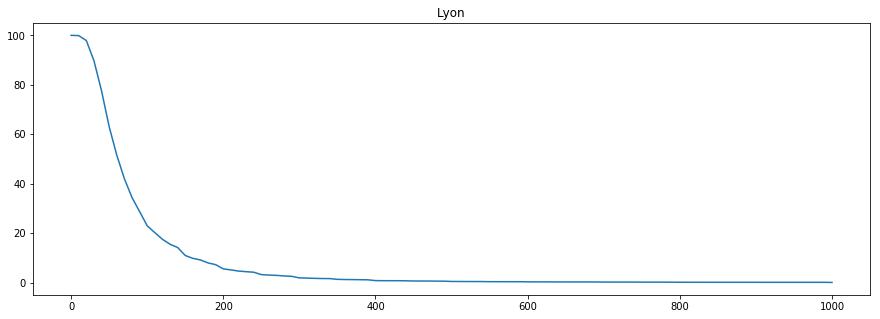

In [38]:
Ly_values = [0] * 25001
Ly_Price_dist = pd.Series(index=indices, data=Ly_values)
for i in cal_Ly_price_distribution.index:
    Ly_Price_dist[i] += cal_Ly_price_distribution[i]
#print(Ly_Price_dist[0:20])
#print(Ly_Price_dist[-20:])

prices = []
percentages = []

for price in np.arange(0, 25000, step=10):
    percent = Ly_Price_dist[Ly_Price_dist.index > price].sum() / cal_Ly_clean_prices_df.shape[0] * 100
    prices.append(price)
    percentages.append(percent)
    #print("Lyon has {} % offerings above {} €.".format(percent, price))
    if percent < 0.1:
        break
percentage_curve = pd.Series(index=prices, data=percentages)
(percentage_curve).plot(figsize=(15, 5));
plt.title("Lyon");

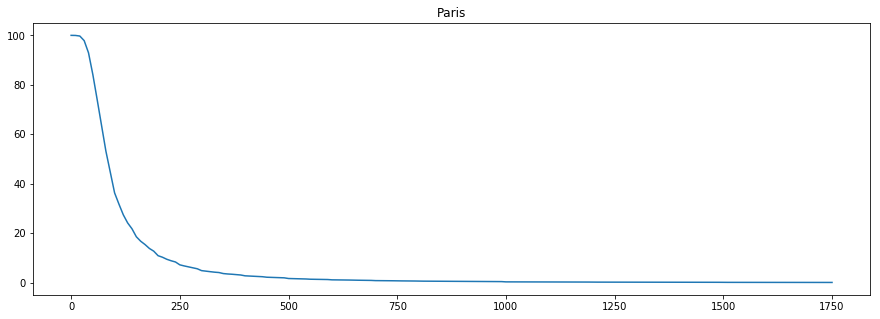

In [39]:
Pa_values = [0] * 25001
Pa_Price_dist = pd.Series(index=indices, data=Pa_values)
for i in cal_Pa_price_distribution.index:
    Pa_Price_dist[i] += cal_Pa_price_distribution[i]
#print(Pa_Price_dist[0:20])
#print(Pa_Price_dist[-20:])

prices = []
percentages = []

for price in np.arange(0, 25000, step=10):
    percent = Pa_Price_dist[Pa_Price_dist.index > price].sum() / cal_Pa_clean_prices_df.shape[0] * 100
    prices.append(price)
    percentages.append(percent)
    #print("Paon has {} % offerings above {} €.".format(percent, price))
    if percent < 0.1:
        break
percentage_curve = pd.Series(index=prices, data=percentages)
(percentage_curve).plot(figsize=(15, 5));
plt.title("Paris");

**Bordeaux** and **Lyon** have a very similar **Price Upper Limit**, whereas **Paris**'s is almost **double**.

Plot and compare the Price Distributions from ***0 to 1,000 €*** and then from ***1,001 to 1,800 €***:

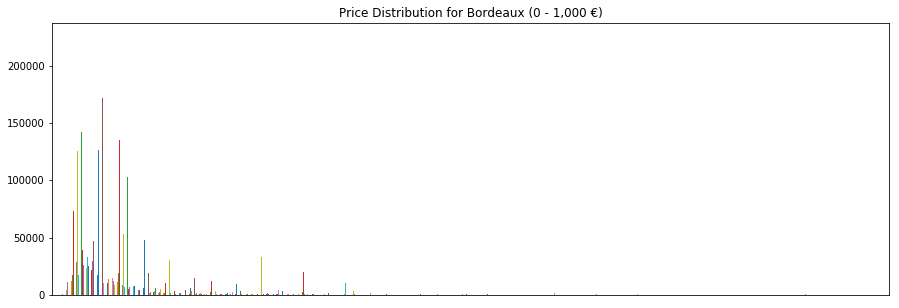

In [74]:
#(Bx_Price_dist[:1000]/cal_Bx_clean_prices_df.shape[0]).plot(kind="bar", figsize=(15, 5));
(Bx_Price_dist[:1000]).plot(kind="bar", figsize=(15, 5));
plt.title("Price Distribution for Bordeaux (0 - 1,000 €)")
#plt.xticks(np.arange(0.0, 1000.0, step=100.0), rotation='horizontal');    # Xticks() doesn't seem to display the correct values...
plt.xticks([]);
#plt.xlabel("Price (k€)");
#plt.yticks([]);

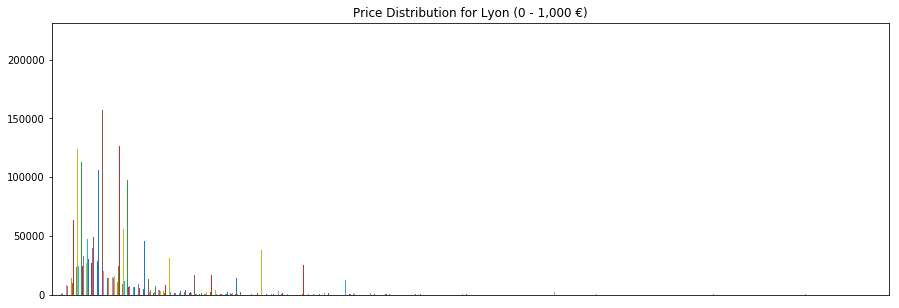

In [75]:
(Ly_Price_dist[:1000]).plot(kind="bar", figsize=(15, 5));
plt.title("Price Distribution for Lyon (0 - 1,000 €)")
plt.xticks([]);

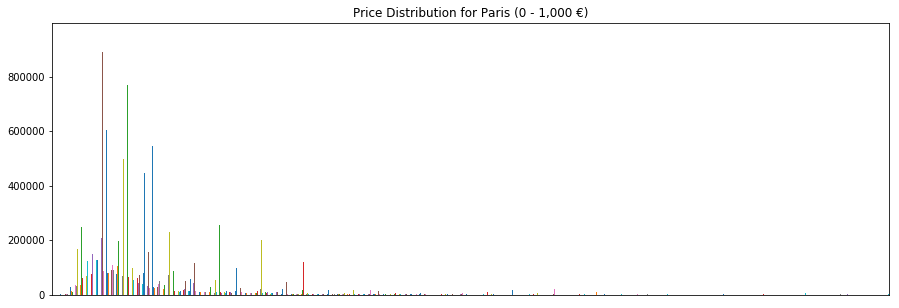

In [76]:
(Pa_Price_dist[:1000]).plot(kind="bar", figsize=(15, 5));
plt.title("Price Distribution for Paris (0 - 1,000 €)")
plt.xticks([]);

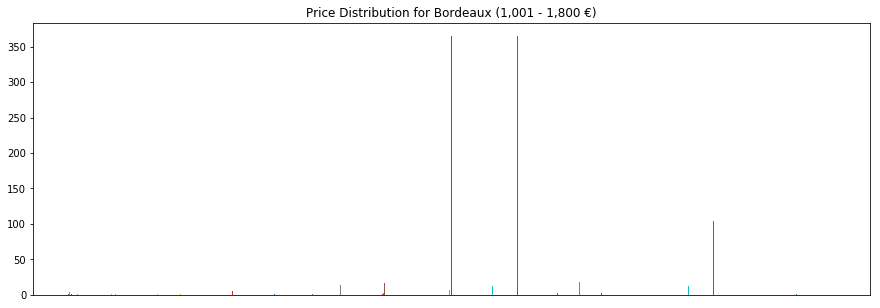

In [65]:
#(Bx_Price_dist[1001:1800]/cal_Bx_clean_prices_df.shape[0]).plot(kind="bar", figsize=(15, 5));
(Bx_Price_dist[1001:1800]).plot(kind="bar", figsize=(15, 5));
plt.title("Price Distribution for Bordeaux (1,001 - 1,800 €)")
#plt.xticks(np.arange(1000.0, 1800.0, step=100.0), rotation='horizontal');    # Doesn't display tick marks from 1000 to 18000
plt.xticks([]);
#plt.xlabel("Price (k€)");
#plt.yticks([]);

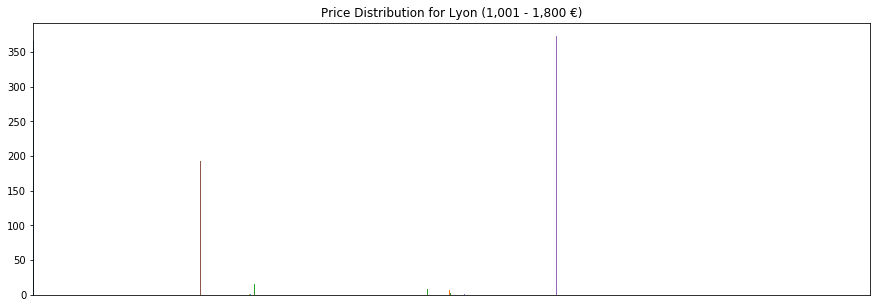

In [66]:
(Ly_Price_dist[1001:1800]).plot(kind="bar", figsize=(15, 5));
plt.title("Price Distribution for Lyon (1,001 - 1,800 €)")
plt.xticks([]);

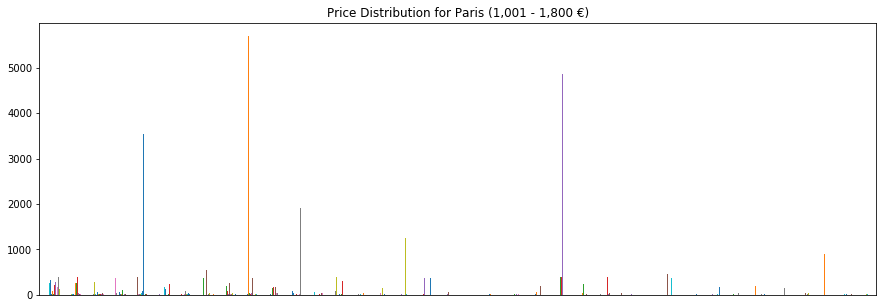

In [72]:
(Pa_Price_dist[1001:1800]).plot(kind="bar", figsize=(15, 5));
plt.title("Price Distribution for Paris (1,001 - 1,800 €)")
plt.xticks([]);

## 1 - Conclusion for Price Distribution ##
 - As seen on the first 3 plots above,  Bordeaux, Lyon, and Paris have very similar Price Distributions in the bulk of the Price range (*i.e.*, below 1,000 €).
 - The following 3 plots show that Paris has a larger offering above 1,000 €. Although Bordeaux and Lyon are beautiful cities, Paris attracts more international tourists, which may explain the difference at the high-end of the Price spectrum.
 
## Compare Availability / Price throughout the year for all 3 Cities ##

To avoid fluctuations due to weekday/weekend activity differences, Pricing throughout the time period is smoothened.

                price
date                 
2019-08-27        NaN
2019-08-28        NaN
2019-08-29        NaN
2019-08-30  82.875922
2019-08-31  82.839787


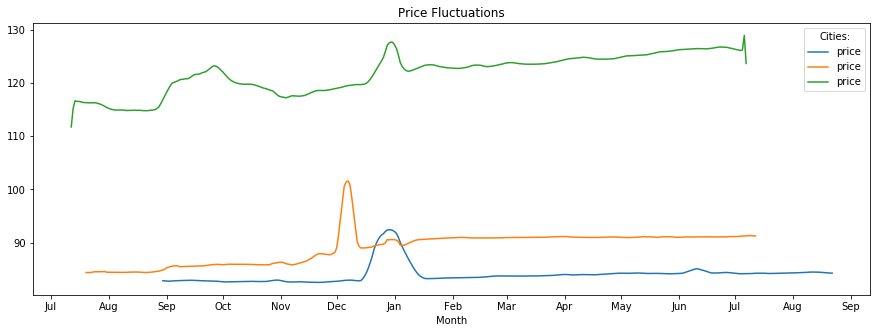

In [89]:
# Group Price data by Date and smoothen over 7 rolling days
Bx_avg_price_by_date = pd.DataFrame(cal_Bx_clean_prices_df.groupby('date')['price'].mean())
Bx_rolling_avg = Bx_avg_price_by_date.rolling(window=7, center=True).mean()
print(Bx_rolling_avg.head())
Ly_avg_price_by_date = pd.DataFrame(cal_Ly_clean_prices_df.groupby('date')['price'].mean())
Ly_rolling_avg = Ly_avg_price_by_date.rolling(window=7, center=True).mean()
Pa_avg_price_by_date = pd.DataFrame(cal_Pa_clean_prices_df.groupby('date')['price'].mean())
Pa_rolling_avg = Pa_avg_price_by_date.rolling(window=7, center=True).mean()

# Plot for all 3 Cities on the same graph
loc = plt_dates.MonthLocator()
fmt = plt_dates.DateFormatter('%b')
plt.figure(figsize=(15, 5))
plt.plot(pd.to_datetime(Bx_rolling_avg.index), Bx_rolling_avg['price'])    # removed label='Bordeaux' because it doesn't work...
plt.plot(pd.to_datetime(Ly_rolling_avg.index), Ly_rolling_avg['price'])
plt.plot(pd.to_datetime(Pa_rolling_avg.index), Pa_rolling_avg['price'])
plt.legend(title='Cities:')
x_axis = plt.gca().xaxis
x_axis.set_major_locator(loc)
x_axis.set_major_formatter(fmt)
plt.xlabel('Month')
plt.title('Price Fluctuations')
plt.show()

## 2 - Conclusion for Seasonal Price Fluctuations ##
The plot above yields 2 main observations:
 - Prices throughout the year are much higher in Paris than in Lyon and in Bordeaux, which again can be explained by the fact that Paris is in the top 3 most visited cities in the World; it's also the economic capital of France. Lyon is larger than Bordeaux, which could explain why the prices are slightly higher in the former; also, Bordeaux is close to the Atlantic Ocean and its many beach resorts which draw lors of tourists.
 - The Prices fluctuate much more in Bordeaux and in Lyon around the year-end holidays, whereas Paris draws people pretty much throughout the year, with peaks around the fall and the year-end holidays.
 
## What Factors have the highest influence on Pricing? ##

???